In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [2]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


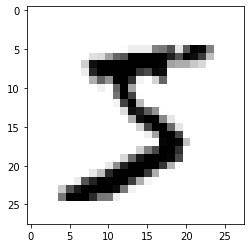

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0],cmap='binary')
plt.show()

In [4]:
y_train[0]

5

In [5]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [6]:
#one hot coding

from tensorflow.keras.utils import to_categorical

y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)

In [7]:
print('y_train_encoded shape:',y_train_encoded.shape)
print('y_test_encoded shape:',y_test_encoded.shape)

y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


In [8]:
#preprocessing the examples

import numpy as np

x_train_reshaped=np.reshape(x_train,(60000,784))
x_test_reshaped=np.reshape(x_test,(10000,784))

In [9]:
print("x_train_reshaped shape:",x_train_reshaped.shape)
print("x_test_reshaped shape:",x_test_reshaped.shape)

x_train_reshaped shape: (60000, 784)
x_test_reshaped shape: (10000, 784)


In [10]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [11]:
#Data Normalization

x_mean=np.mean(x_train_reshaped)
x_std=np.std(x_train_reshaped)

epsilon=1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

In [12]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

In [13]:
#creating a model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128,activation='relu',input_shape = (784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
    
])

In [14]:
#compiling the model

model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']

)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train_norm,y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 4ms/step - loss: 0.3783 - accuracy: 0.8909
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1852 - accuracy: 0.9462
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1412 - accuracy: 0.9589


In [17]:
#evaluating the model
loss,accuracy=model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy: ',accuracy*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.1369 - accuracy: 0.9602
Test set accuracy:  96.02000117301941


In [18]:
preds=model.predict(x_test_norm)
preds.shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

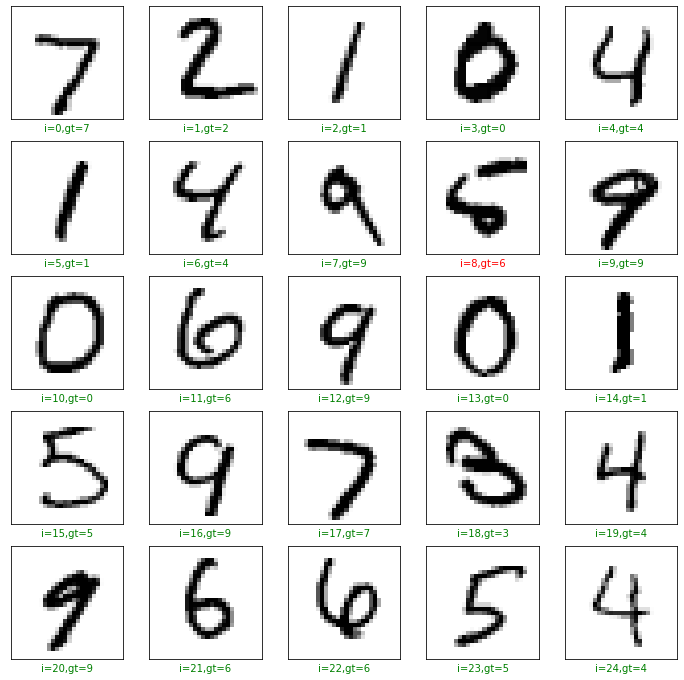

In [19]:
plt.figure(figsize=(12,12))

start_index = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]
    
    col='g'
    if(pred!=gt):
        col='r'
        
    plt.xlabel('i={},gt={}'.format(start_index+i,pred,gt),color=col)
    plt.imshow(x_test[start_index+i],cmap='binary')
plt.show()    

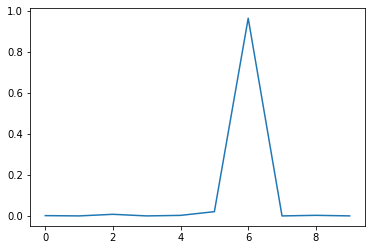

In [52]:
plt.plot(preds[8])
plt.show()

In [28]:
tf.keras.models.save_model(model,'my_model2.hdf5')

In [25]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf



# Create the GUI window
window = tk.Tk()
window.title("Character Recognition")
window.geometry("1000x700")

# Function to preprocess the image and make predictions
def predict_character():
    # Open file dialog to choose an image
    file_path = filedialog.askopenfilename()
    if file_path:
        # Load the image and preprocess
        image = Image.open(file_path)
        image = image.resize((28, 28))  # Resize to match the model's input shape
        image = image.convert('L')  # Convert to grayscale
        image = np.array(image)  # Convert to numpy array
        image = image / 255.0  # Normalize pixel values
        x_mean=np.mean(image)
        x_std=np.std(image)

        epsilon=1e-10

        image = (image - x_mean) / (x_std + epsilon)

        # Reshape the image to match the model's input shape
        image = np.reshape(image, (1, 784, ))

        # Make prediction
        prediction = model.predict(image)
        predicted_class = np.argmax(prediction)
        print(prediction)

        # Display the predicted character
        result_label.config(text=f"Predicted character: {predicted_class}")

        # Display the input image
        img = ImageTk.PhotoImage(Image.open(file_path))
        image_label.config(image=img)
        image_label.image = img

# Create the button for image selection
select_button = tk.Button(window, text="Select Image", command=predict_character)
select_button.pack(pady=10)

# Create label to display the predicted character
result_label = tk.Label(window, text="Predicted character: ")
result_label.pack(pady=10)

# Create label to display the input image
image_label = tk.Label(window)
image_label.pack()


# Start the GUI main loop
window.mainloop()

1/1 [==============================] - 0s 29ms/step
[[4.6724034e-03 5.1793293e-04 1.5528360e-03 2.8751723e-03 3.2459313e-05
  9.8144460e-01 1.3802617e-03 7.0069041e-03 2.2938639e-04 2.8805379e-04]]
